#IRIS FLOWER CLASSIFICATION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***LOADING DATASET***

In [5]:
df= pd.read_csv('/content/drive/MyDrive/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Processing Dataset

In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

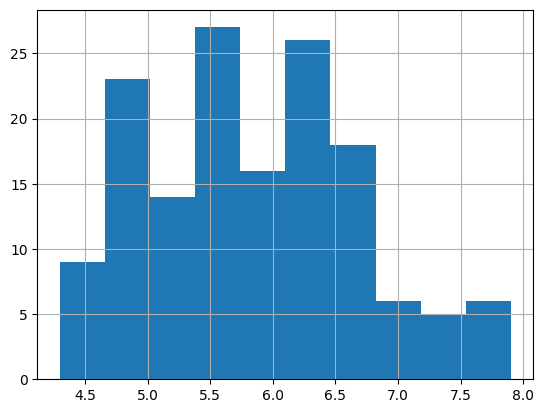

In [19]:
df['sepal_length'].hist()

<Axes: >

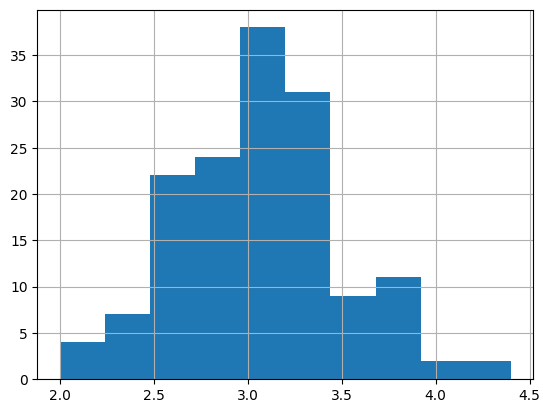

In [20]:
df['sepal_width'].hist()

<Axes: >

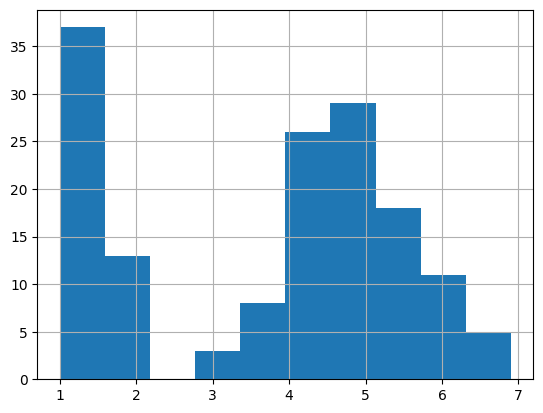

In [21]:
df['petal_length'].hist()

<Axes: >

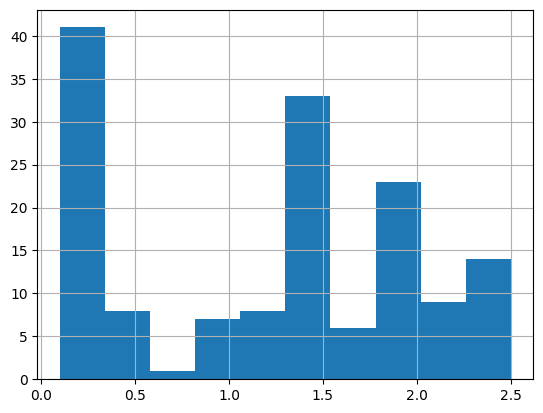

In [22]:
df['petal_width'].hist()

In [27]:
colors=['red','orange','blue']
species=['Iris-setosa',
'Iris-versicolor',
'Iris-virginica' ]

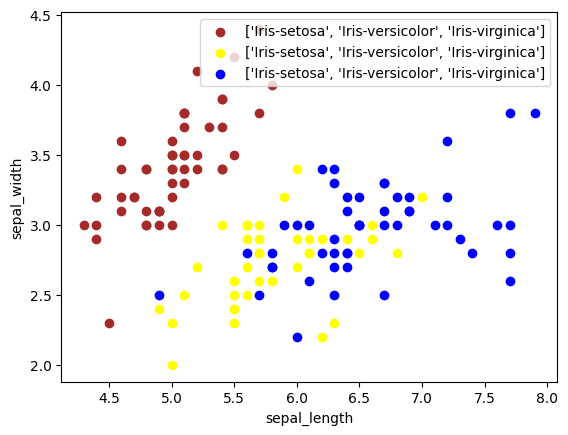

In [40]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

In [41]:
colors=['brown','yellow','blue']
species=['Iris-setosa',
'Iris-versicolor',
'Iris-virginica' ]


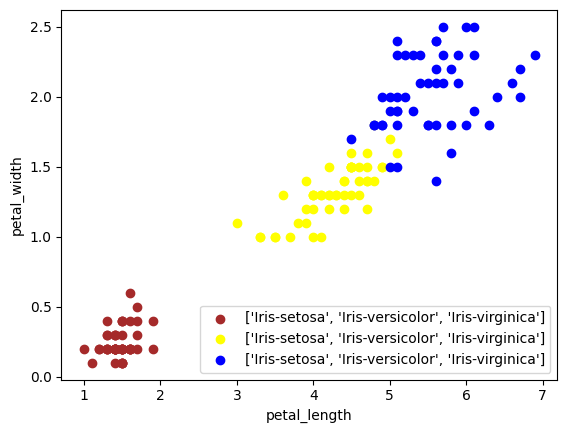

In [43]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

In [45]:
colors=['green','yellow','orange']
species=['Iris-setosa',
'Iris-versicolor',
'Iris-virginica' ]

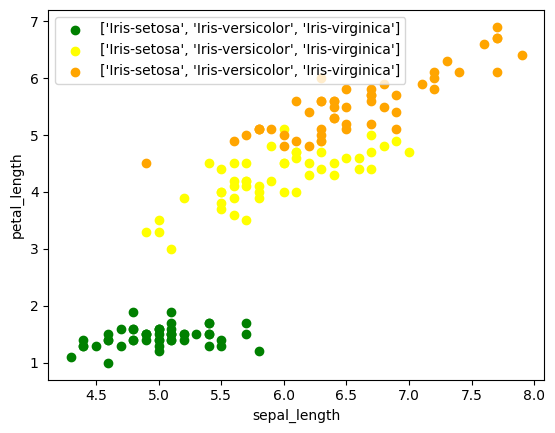

In [46]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

***Coorelation with Matrix***

In [47]:
df.corr()

<ipython-input-47-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-48-e8443741cfde>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

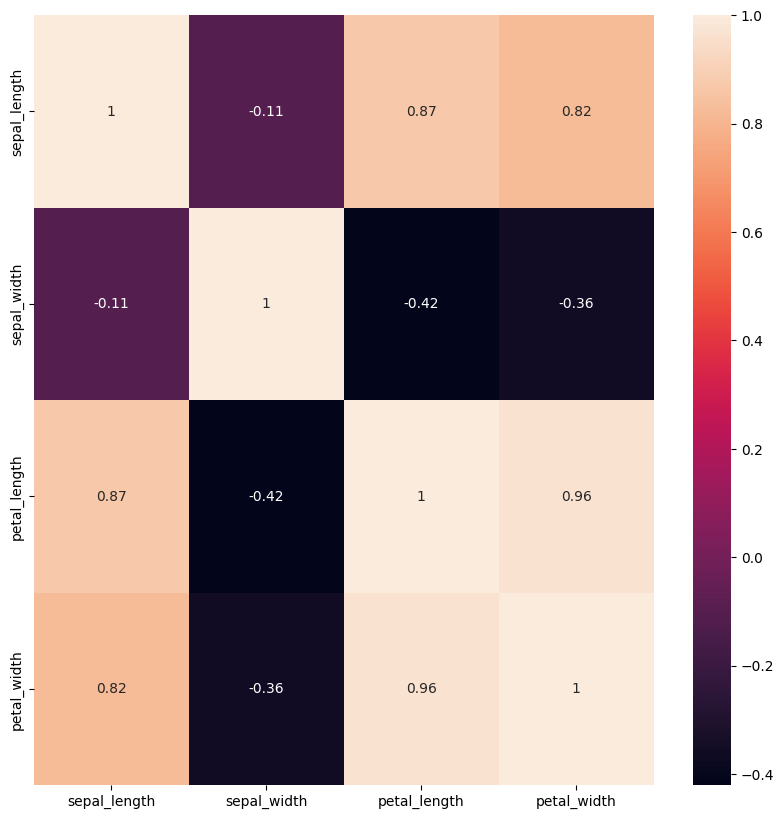

In [48]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

<ipython-input-49-b7d9b5325e24>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

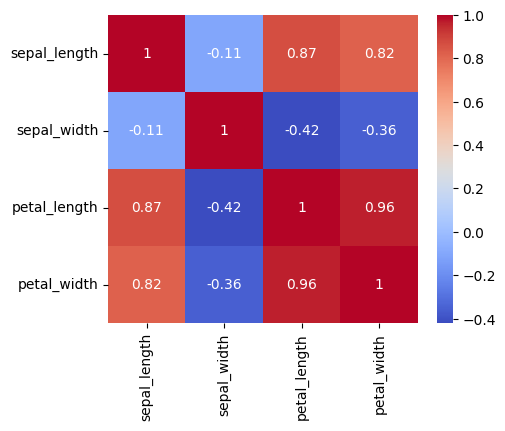

In [49]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True, ax=ax,cmap='coolwarm')


***Label Encoder***

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
df['species'] =le.fit_transform(df['species'])

In [52]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [60]:
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [63]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [65]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [68]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [69]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777
